# Titanic Survival Prediction Project

**Project Overview:**
This Jupyter Notebook documents the Titanic Survival Prediction project, which aims to predict passenger survival during the tragic sinking of the Titanic. We analyze various factors such as socio-economic status, age, gender, and more to develop an accurate survival prediction model.

**Project Highlights:**
- Data Loading and Exploration
- Data Preprocessing
- Model Training and Evaluation
- Experimenting with Multiple Algorithms
- Selecting and Fine-Tuning the Best Model

**Project Objectives:**
- Analyze and visualize Titanic dataset
- Build predictive models to determine survival
- Evaluate and compare model performance
- Provide insights for passenger survival factors

**Contact Information:**
LinkedIn: [Asad Ali Mulla's LinkedIn Profile](https://www.linkedin.com/in/asad-ali-mulla-044240262/)
GitHub: [Asad Ali Mulla's GitHub Profile](https://github.com/Asadxio)


## Task: The task is to create a system that predicts whether a person would survive the Titanic sinking based on factors such as socio-economic status, age, gender, and more.

## Data Loading and Exploration

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


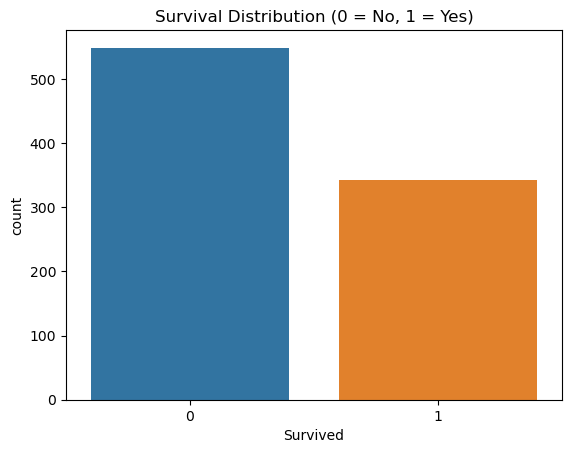

In [5]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.show()

In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
num_imputer = SimpleImputer(strategy='mean')
train_data[['Age', 'Fare']] = num_imputer.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = num_imputer.transform(test_data[['Age', 'Fare']])

In [9]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X_train) and the target variable (y_train)
y_train = train_data['Survived']
X_train = train_data.drop('Survived', axis=1)

In [11]:
# Split the training data into training and validation sets (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# Initialize the Logistic Regression model
model = LogisticRegression()

In [13]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Make predictions on the validation data
y_valid_pred = model.predict(X_valid)

In [15]:
# Calculate accuracy on the validation data
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Accuracy on Validation Data: {accuracy:.2f}")

Accuracy on Validation Data: 0.78


In [16]:
# Print a classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [17]:
# Display a confusion matrix to visualize true positives, true negatives, false positives, and false negatives
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_valid_pred))


Confusion Matrix:
[[88 17]
 [23 51]]


In [18]:
# Initialize different classification models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

In [19]:
# Evaluate each model using cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    
    print(f"{name}:")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Standard Deviation: {std_accuracy:.2f}")
    print()

Logistic Regression:
Mean Accuracy: 0.77
Standard Deviation: 0.04

Random Forest:
Mean Accuracy: 0.81
Standard Deviation: 0.01

Support Vector Machine:
Mean Accuracy: 0.65
Standard Deviation: 0.01

K-Nearest Neighbors:
Mean Accuracy: 0.62
Standard Deviation: 0.03

Decision Tree:
Mean Accuracy: 0.73
Standard Deviation: 0.02



In [21]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_valid_pred = best_model.predict(X_valid)

In [22]:
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Accuracy on Validation Data: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_valid_pred))

Accuracy on Validation Data: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
[[94 11]
 [19 55]]
